In [2]:
import re 
import numpy as np
import pandas as pd 
import matplotlib as plt
from cleantext import clean
pd.set_option('display.max_colwidth', True)

# Part 1 : 
This finds every cpr in a string and returns its relevent information.
Not relevent for the exercise

In [3]:
text = '''adakaf
314251-4512
dad, 1001011110,fksfjwokff., 31314
222276-4390
1315208121
	'''
pattern= re.compile(r'(\d\d)(\d\d)(\d\d)-?(\d{4})')
match= pattern.finditer(text)
for x in match : 
        print(x.groups())
        dd = x.group(1)
        mm= x.group(2)
        yy =x.group(3)
        zz= x.group(4)
        print (yy)
        if '0'<=yy<='99' and '1'<=zz<='3999' :
            print ('Born in 1900')
    
        elif  '0'<=yy<='36' and '4000'<=zz<='4999' :
            print ('Born in 2000')
    
        elif  '37'<=yy<='99' and '4000'<=zz<='4999' :
            print ('Born in 1900')
    
        elif  '00'<=yy<='57' and '5000'<=zz<='8999' :
            print ('Born in 2000')
    
        elif  '58'<=yy<='99' and '5000'<=zz<='8999' :
            print ('Born in 1800')
        
        elif  '00'<yy<'36' and '9000'<zz<'9999' :
            print ('Born in 2000')
    
        elif  '37'<yy<'99' and '9000'<zz<'9999' :
            print ('Born in 1900')

#A pattern that matches CPR in DDMMYYIIII format
# 


('31', '42', '51', '4512')
51
Born in 1900
('10', '01', '01', '1110')
01
Born in 1900
('22', '22', '76', '4390')
76
Born in 1900
('13', '15', '20', '8121')
20
Born in 2000


A function that takes a cpr and returns the century as an integer


In [4]:
def extract_cpr_info(cpr):
    pattern= re.compile(r'(\d\d)(\d\d)(\d\d)-?(\d{4})')
    match= pattern.finditer(cpr)
    for x in match : 
            # print(x.groups())
            # dd = x.group(1)
            # mm= x.group(2)
            # yy =x.group(3)
            # zz= x.group(4)
            # print (yy)
            yy = x.group(3)
            zz = x.group(4)
            dd= x.group(1)
            mm= x.group(2)
            if '0'<=yy<='99' and '1'<=zz<='3999' :
                return 1900
        
            elif  '0'<=yy<='36' and '4000'<=zz<='4999' :
                return 2000
        
            elif  '37'<=yy<='99' and '4000'<=zz<='4999' :
                return 1900
        
            elif  '00'<=yy<='57' and '5000'<=zz<='8999' :
                return 2000
        
            elif  '58'<=yy<='99' and '5000'<=zz<='8999' :
                return 1800
            
            elif  '00'<=yy<='35' and '9000'<=zz<='9999' :
                return 2000
        
            elif  '36'<=yy<='99' and '9000'<=zz<='9999' :
                return 1900
            else : 
                return 'Invalid-No CPR number'

In [5]:

print (extract_cpr_info('214353-2121'))
print (extract_cpr_info('111159-5001'))




1900
1800


# Part 2:
Processing the FakeNewsCorpus data set

In [6]:
df = pd.read_csv('news_sample.csv') 
df.info()
df.head(5)


<class 'pandas.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        250 non-null    int64  
 1   id                250 non-null    int64  
 2   domain            250 non-null    str    
 3   type              238 non-null    str    
 4   url               250 non-null    str    
 5   content           250 non-null    str    
 6   scraped_at        250 non-null    str    
 7   inserted_at       250 non-null    str    
 8   updated_at        250 non-null    str    
 9   title             250 non-null    str    
 10  authors           170 non-null    str    
 11  keywords          0 non-null      float64
 12  meta_keywords     250 non-null    str    
 13  meta_description  54 non-null     str    
 14  tags              27 non-null     str    
 15  summary           0 non-null      float64
dtypes: float64(2), int64(2), str(12)
memory usage: 31.4 KB


,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift-to-waitresses-working-on-christmas-eve-has-them-crying-video/,"Sometimes the power of Christmas will make you do wild and wonderful things. You do not need to believe in the Holy Trinity to believe in the positive power of doing good for others. The simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. One congregation in Ohio was moved to action by the power of a sermon given at their church on Christmas Eve. The pastor at Grand Lake United Methodist Church in Celina, Ohio gave an emotional sermon about the importance of understanding the message of Jesus.\n\nFor many religious people the message of Jesus is to help others before yourself, to make sure the people who are suffering get the help they need to enjoy life a little bit. The sermon was really about generosity and what that can look like in our lives. Jesus lived a long time ago and he acted generously in the fashion of his time – but what would a generous act look like in our times? That was the focus of the sermon.\n\nThe potency of the sermon was not lost on the congregation, who were so moved they had to take action! After the sermon ended, the congregation decided to take an offering. A bowl was passed around the room and everyone pitched in what they could on this Christmas Eve with the words of the sermon still ringing in their ears.\n\nWhat did they do with this offering? Members of the congregation drove down to the local Waffle House to visit the ladies working the night shift. What a great choice on this most holy of days when everyone should be with their families!\n\nThe ladies working at Waffle House clearly were not with their families. They had no choice but to work on this holy day because it paid the bills. The congregation understood the sacrifice being made by these ladies, and wanted to help them out. They donated the entire offering to be split amongst the ladies at Waffle House.\n\nIn total that amounted to $3,500 being split amongst the staff. What a beautiful moment! What a perfect example of what the preacher was talking about in his sermon! Doing a good deed like this on Christmas really helped ease the burden felt by the ladies working at Waffle House. Sure, they could not see their families, but at least they got a little gift from the good people of their community.\n\nPerhaps the best part about this whole event was that the congregation did not ask anything in return. It was a simple act of generosity from people who understood the pain being felt by another group and sought to alleviate some of that pain. It speaks volumes about the merits of the Church in our daily lives. This simple act brought the entire community together because it showed empathy and compassion on the most special day of the year.",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Church Congregation Brings Gift to Waitresses Working on Christmas Eve, Has Them Crying (video)",Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/2018/01/awakening-of-12-strands-of-dna-reconnecting-with-you-movie-10623.html,"AWAKENING OF 12 STRANDS of DNA – “Reconnecting with You” Movie\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\n[January 24, 2018 - ZurichTimes.net]\n\nAs Miles Johnston was giving update, it was another case of Strange Synchronicities of Goodness Hidden inside of Tests and Trials, like a Follow the WhiteRabbit down the Rabbit Hole type of exercise.\n\nIn Researching the 12 Strands of DNA we came across some articles, one in particular was as a Strange Synchroni

In [7]:
# Most of these expression was taken from stack-overflow aand the internet
#str.  is a pandas method, that turns tells pandas to treat every row in the series as a string, and then apply the method to it,
# for example 'str.lower()' turns every row in the series to lowercase, and 'str.replace()' replaces the pattern with the specified string in every row of the series
## Vectorization : This design proccesses the whole series at once rather than iterating through every element
# I could have used the 'apply()' method which loops through each row, but this method is faster
## .apply() method : A hidden for-loop that iterates through each (column)
def clean_text(series):
    series = series.str.lower()
    series = series.str.replace(r'https?://\S+|www\.\S+', '<URL>', regex=True)
    series = series.str.replace(r'[\w.-]+@[\w]+\.[\w]+', '<EMAIL>' ,regex=True)
    series = series.str.replace(r'\d{2,4}[-/]\d{2,4}[-/]\d{2,4}', '<DATE>', regex=True)
    #series = series.str.replace(r'\d{1,2}/\d{1,2}/\d{2,4}', '<DATE>', regex=True)
    series = series.str.replace(r'\d+', '<NUM>', regex=True)    
    series = series.str.replace(r'\s+', ' ', regex=True)
    series = series.str.replace(r'[^\w\s<>]', ' ', regex=True)
    series = series.str.replace(r'\s+', ' ', regex=True)
    series = series.str.strip()
    return series

df['clean_txt'] = clean_text(df['content'])
pd.set_option('display.max_colwidth', 400)
df[['content', 'clean_txt']].head()

,content,clean_txt
0,"Sometimes the power of Christmas will make you do wild and wonderful things. You do not need to believe in the Holy Trinity to believe in the positive power of doing good for others. The simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. One congregation in Ohio was moved to action by t...",sometimes the power of christmas will make you do wild and wonderful things you do not need to believe in the holy trinity to believe in the positive power of doing good for others the simple act of giving without receiving is lost on many of us these days as worries about money and success hold us back from giving to others who are in need one congregation in ohio was moved to action by the p...
1,"AWAKENING OF 12 STRANDS of DNA – “Reconnecting with You” Movie\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\n[January 24, 2018 - ZurichTimes.net]\n\nAs Miles Johnston was giving update, it was another case of Strange Synchronicities of Goodness Hidden inside of Tests and Trials, like a Follo...",awakening of <NUM> strands of dna reconnecting with you movie of readers think this story is fact add your two cents headline bitcoin blockchain searches exceed trump blockchain stocks are next january <NUM> <NUM> zurichtimes net as miles johnston was giving update it was another case of strange synchronicities of goodness hidden inside of tests and trials like a follow the whiterabbit down th...
2,"Never Hike Alone: A Friday the 13th Fan Film USA | 2017 | 54 min A fan tribute to Friday the 13th, Never Hike Alone follows an adventure\n\nNever Hike Alone: A Friday the 13th Fan Film USA | 2017 | 54 min\n\n\n\nA fan tribute to Friday the 13th, Never Hike Alone follows an adventure blogger, Kyle McLeod (Andrew Leighty), who uncovers the long lost remains of Camp Crystal Lake while on a solo b...",never hike alone a friday the <NUM>th fan film usa <NUM> <NUM> min a fan tribute to friday the <NUM>th never hike alone follows an adventure never hike alone a friday the <NUM>th fan film usa <NUM> <NUM> min a fan tribute to friday the <NUM>th never hike alone follows an adventure blogger kyle mcleod andrew leighty who uncovers the long lost remains of camp crystal lake while on a solo backpac...
3,"When a rare shark was caught, scientists were left blundering for answers. This shark has a unique feature. And it’s not that it can survive at extreme depths or live for an extended period of time. This shark’s unique trait is that it can extend its jaw in a telescoping fashion beyond its mouth. If you’ve ever seen the hit science fiction movie “Alien,” this shark is that monster made manifes...",when a rare shark was caught scientists were left blundering for answers this shark has a unique feature and it s not that it can survive at extreme depths or live for an extended period of time this shark s unique trait is that it can extend its jaw in a telescoping fashion beyond its mouth if you ve ever seen the hit science fiction movie alien this shark is that monster made manifest on ear...
4,Donald Trump has the unnerving ability to ability to create his own reality and convince millions of Americans that what he says it is true. The problem with the president lying is that he then believes his own lies. A new poll shows how that can get the country into deep trouble.\n\nThe new ABC News/Washington Post poll came out after the president’s physician gave him a physical and mental e...,donald trump has the unnerving ability to ability to create his own reality and convince millions of americans that what he says it is true the problem with the president lying is that he then believes his own lies a new poll shows how that can get the country into deep trouble the new abc news washington post poll came out after the president s physician gave 

This was tested to make sure that my expressions does what they claim 


In [8]:
## .sub is a regex methods that handles strings, not a series, a different approach to cleaning
text = '''Hello how are you www.google.com    akdad@outlook.com
ajfnwjef-as1231@gas.net12/21/2012,
2002-21-21,   12-21-2002 KAKAKAKAKAKA
adkafaf .
'''
def clean_row(text):
    # 1. Ensure it's a string (handles NaN)
    text = str(text).lower()
    
    # 2. Use re.sub() instead of .str.replace()
    # Replace URLs
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
    # Replace Emails
    text = re.sub(r'[\w.-]+@[\w]+\.[\w]+', '<EMAIL>', text)
    # Replace Dates
    text = re.sub(r'\d{2,4}[-/]\d{2,4}[-/]\d{2,4}', '<DATE>', text)
    # Replace Numbers
    text = re.sub(r'\d+', '<NUM>', text)
    # 3. Remove punctuation and extra whitespace
    text = re.sub(r'[^\w\s<>]', ' ', text) # Keeps <URL>, <NUM>, etc.
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()
print (clean_row(text))
print(clean_text(pd.Series([text])))

hello how are you <URL> <EMAIL> <EMAIL> <NUM> <NUM> <DATE> <DATE> kakakakakaka adkafaf
0    hello how are you <URL> <EMAIL> <EMAIL> <NUM> <NUM> <DATE> <DATE> kakakakakaka adkafaf
dtype: str


Using clean-text lib

In [9]:
df['content'] = df['content'].apply(lambda x: clean(x,
	fix_unicode=True,               # fix various unicode errors
    lower=True,                     # lowercase text
    no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
    no_urls=False,                  # replace all URLs with a special token
    no_emails=False,                # replace all email addresses with a special token
    no_numbers=False,               # replace all numbers with a special token
    no_digits=False,                # replace all digits with a special token
    no_punct=False,                 # remove punctuations
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_phone_number="<PHONE>",
    replace_with_ip_address="<IP>",
    replace_with_number="<NUM>",
    replace_with_digit="0",
    lang="en"
))


print (df['content'])

0      sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the positive power of doing good for others. the simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. one congregation in ohio was moved to action by t...
1      awakening of 12 strands of dna "reconnecting with you" movie\n% of readers think this story is fact. add your two cents.\nheadline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!\n[january 24, 2018 - zurichtimes.net]\nas miles johnston was giving update, it was another case of strange synchronicities of goodness hidden inside of tests and trials, like a follow the whit...
2      never hike alone: a friday the 13th fan film usa | 2017 | 54 min a fan tribute to friday the 13th, never hike alone follows an adventure\nnever hike alone: a friday the 13th fan f

Most Frequent words before removing stop-words 


Unique words BEFORE cleaning: 26546
Unique words AFTER cleaning:  15373
Reduction in vocabulary:      11173 words


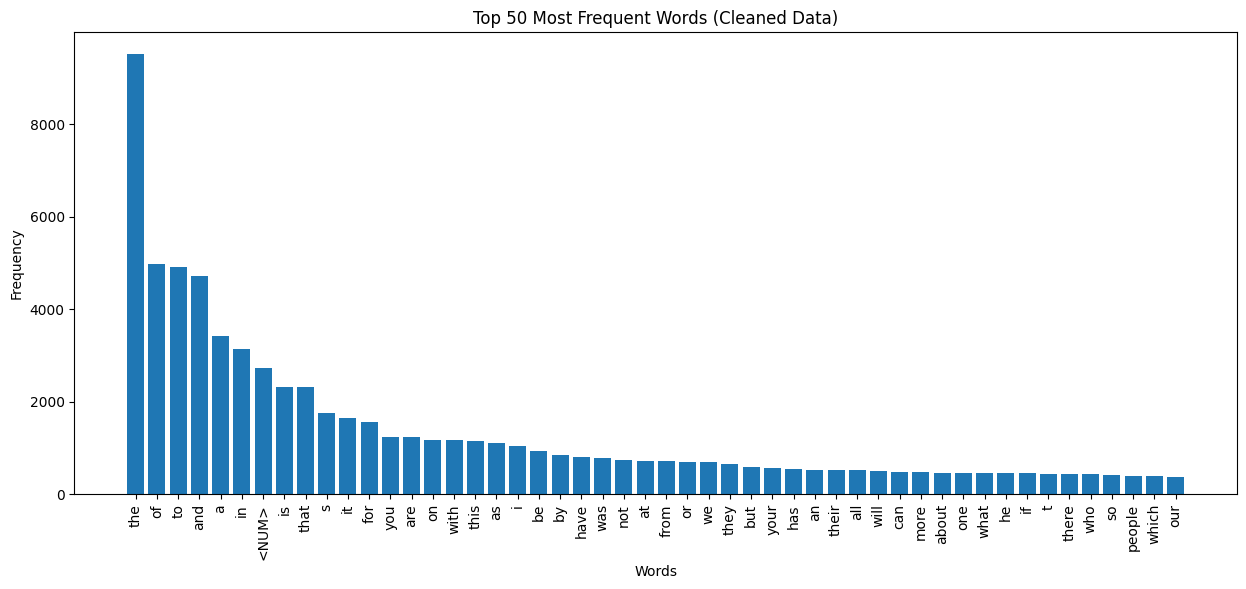

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
# 1. Tokenize (split into words)
# We use simple whitespace splitting for a fair comparison
raw_words = df['content'].str.split().explode()
clean_words = df['clean_txt'].str.split().explode()
## explode() turns a series of lists into a long series of individual words, so we can count them easily
# 2. Calculate Unique Words (Vocabulary Size)
vocab_raw = len(set(raw_words)) ## = Vocabulary size is the number of unique words in the corpus // Because set removes duplicates, so we get only unique words
vocab_clean = len(set(clean_words)) ## = Vocabulary size is the number of unique words in the corpus 
## I wasnt sure if I should use number of tokens or number of unique words, hopefully i can get some feedback on this 
print(f"Unique words BEFORE cleaning: {vocab_raw}")
print(f"Unique words AFTER cleaning:  {vocab_clean}")
print(f"Reduction in vocabulary:      {vocab_raw - vocab_clean} words")

# 3. Calculate Frequency of Cleaned Words
# Counter creates a dictionary like {'the': 500, 'news': 120, ...}
word_counts = Counter(clean_words)

# Get the 50 most common words
top_50 = word_counts.most_common(50)

# Separate words and counts for plotting
words = [x[0] for x in top_50]
counts = [x[1] for x in top_50]

# 4. Plotting
plt.figure(figsize=(15, 6))  # Make the chart wide enough
plt.bar(words, counts)
plt.xticks(rotation=90)      # Rotate labels so they don't overlap
plt.title("Top 50 Most Frequent Words (Cleaned Data)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Lets remove stop-words

In [11]:
# First i define a list of stop words
stop_words = [
    "the", "of", "to", "and", "a", "in", "is", "that", "for", "are", 
    "it", "with", "on", "as", "this", "you", "be", "by", "i", "have",
    "was", "not", "from", "at", "or", "they", "but", "we", "your", 
    "has", "an", "their", "will", "all","us" ,"more", "can", "about", "if", 
    "he", "who", "what", "one", "which", "our", "were", "his", "been", "so", "like", "s", "t", "there","there", "these","do", "would","its", "when", "being", "even", "next", 
    "over", "after", "them", "think", "had", "how","new","also", "some","up","out", "time","people","no" ]
# Spilt text/string into a list of words : 
def remove_stop (text, stop_words) : 
    string_to_words = str(text)
    pattern = re.compile(r'\b(' + '|'.join(stop_words) + r')\b')
    clean_text = pattern.sub('', text)
    # 3. Clean up the messy white space left behind (double spaces, tabs, etc.)
    return re.sub(r'\s+', ' ', clean_text).strip()    

# Assuming your text column is named 'content'
# We use a lambda to pass both the cell value and your stop_words list
df['clean_txt'] = df['clean_txt'].apply(lambda x: remove_stop(x, stop_words))

df['clean_txt']




0      sometimes power christmas make wild wonderful things need believe holy trinity believe positive power doing good others simple act giving without receiving lost many days worries money success hold back giving others need congregation ohio moved action power sermon given church christmas eve pastor grand lake united methodist church celina ohio gave emotional sermon importance understanding me...
1      awakening <NUM> strands dna reconnecting movie readers story fact add two cents headline bitcoin blockchain searches exceed trump blockchain stocks january <NUM> <NUM> zurichtimes net miles johnston giving update another case strange synchronicities goodness hidden inside tests trials follow whiterabbit down rabbit hole type exercise researching <NUM> strands dna came across articles particula...
2      never hike alone friday <NUM>th fan film usa <NUM> <NUM> min fan tribute friday <NUM>th never hike alone follows adventure never hike alone friday <NUM>th fan film usa <NUM> <NUM>

Unique words BEFORE cleaning: 26546
Unique words AFTER cleaning:  15294
Reduction in vocabulary:      11252 words


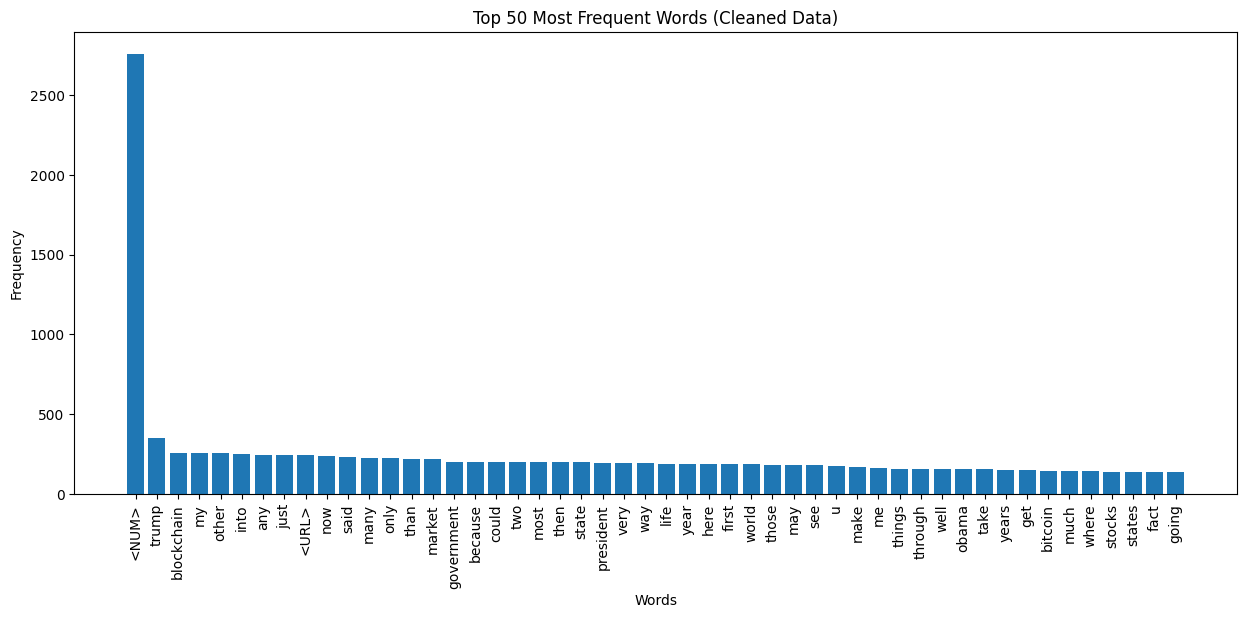

In [12]:

	# 1. Tokenize (split into words)
	# We use simple whitespace splitting for a fair comparison

raw_words = df['content'].str.split().explode()
clean_words = df['clean_txt'].str.split().explode()
# 2. Calculate Unique Words (Vocabulary Size)
vocab_raw = len(set(raw_words))
vocab_clean = len(set(clean_words))
print(f"Unique words BEFORE cleaning: {vocab_raw}")
print(f"Unique words AFTER cleaning:  {vocab_clean}")
print(f"Reduction in vocabulary:      {vocab_raw - vocab_clean} words")
# 3. Calculate Frequency of Cleaned Words
# Counter creates a dictionary like {'the': 500, 'news': 120, ...}
word_counts = Counter(clean_words)
# Get the 50 most common words
top_50 = word_counts.most_common(50)
# Separate words and counts for plotting
words = [x[0] for x in top_50]
counts = [x[1] for x in top_50]
# 4. Plotting
plt.figure(figsize=(15, 6))  # Make the chart wide enough
plt.bar(words, counts)
plt.xticks(rotation=90)      # Rotate labels so they don't overlap
plt.title("Top 50 Most Frequent Words (Cleaned Data)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Part 4 : Gathering Links 


In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time 


In [37]:
browser = webdriver.Firefox() 
url = 'https://www.bbc.com/news'
browser.get(url)
print(f"Successfully visited: {browser.title}")


Successfully visited: BBC News - Breaking news, video and the latest top stories from the U.S. and around the world


Removing Cookies 


In [38]:

browser.switch_to.frame(browser.find_element(By.CSS_SELECTOR, "iframe[id^='sp_message_iframe']"))

button1 = browser.find_element(By.CSS_SELECTOR, "button[title='I agree']")
button1.click()
browser.switch_to.default_content()


Semi-Automated news scrapping that extract headlines-url-summary for a pre-defined set of regions
-Mostly Based on Lau's code -

In [35]:

def scrape_via_next_button(driver, num_pages):
    wait = WebDriverWait(driver, 10)
    data = []
    regions = ['US & Canada', 'UK', 'Africa', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East']
    for region in regions :
        print (f'Currently proccessing {region}')
        try :
            region_btn = wait.until(EC.element_to_be_clickable((By.LINK_TEXT, region)))
            region_btn.click()
            time.sleep(3)
        except Exception as e:
            print(f"Could not click region '{region}'. Skipping... Error: {e}")
            continue

        for i in range(1, num_pages + 1):
            print(f"--- Processing Page {i} ---")
            # 1. SCRAPE THE CURRENT PAGE
            # (Your scraping logic goes here)
            links = browser.find_elements(By.TAG_NAME, 'a')
            for link in links:
                try:
                    # 1. Try to find a headline INSIDE this link
                    # (This will fail for menu buttons(headers,footers...), but work for article cards (trageted news "cards")
                    hd = link.find_element(By.CSS_SELECTOR, "[data-testid='card-headline']").text
                    summ= link.find_element(By.CSS_SELECTOR,"[data-testid='card-description']").text
                    url = link.get_attribute('href')
                    data.append  ({
                        'Headlines' : hd ,
                        'Summary' : summ,
                        'URL' : url})
    
                    # print(f"Headline: {hd}")
                    # print(f"Summary: {summ}")
                    # print(f"URL:    {url}")
                    # print("-" * 20)
                except:
                    # If the link doesn't have a headline inside it, just skip it!
                    continue    
            # 2. CLICK NEXT (Don't click on the very last page!)
            if i < num_pages:
                try:
                    # Find the 'Next' button (replace with actual ID/Class/Text)
                    next_btn = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR,f"button[aria-label='Go to page {i+1}']")))
                    # Scroll to it if necessary
                    driver.execute_script("arguments[0].scrollIntoView();", next_btn)
                    next_btn.click()
                    # Wait for old content to disappear (optional but recommended)
                    time.sleep(2) 
                except Exception as e:
                    print(f"Could not find next button: {e}")
                    break
        
    df = pd.DataFrame(data) 
    return df
    



In [39]:
news = scrape_via_next_button(browser, 12)

Currently proccessing US & Canada
--- Processing Page 1 ---
--- Processing Page 2 ---
--- Processing Page 3 ---
--- Processing Page 4 ---
--- Processing Page 5 ---
--- Processing Page 6 ---
--- Processing Page 7 ---
--- Processing Page 8 ---
--- Processing Page 9 ---
--- Processing Page 10 ---
--- Processing Page 11 ---
Could not find next button: Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:202:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:555:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Currently proccessing UK
--- Processing Page 1 ---
--- Processing Page 2 ---
--- Processing Page 3 ---
--- Processing Page 4 ---
--- Processing Page 5 ---
--- Processing Page 6 ---
--- Processing Page 7 ---
--- Processing Page 8 ---
--- Processing Page 9 ---
--- Processing Page 10 ---
--- Processing Page 11 ---
--- Processing Page 12 ---

In [40]:
news 

,Headlines,Summary,URL
0,Grey's Anatomy star Eric Dane dies at 53 after ALS diagnosis,"The actor, who also starred in HBO's Euphoria, battled the most common form of motor neurone disease.",https://www.bbc.com/news/articles/c78j01n775ko
1,New Mexico reopens criminal inquiry into Jeffrey Epstein's Zorro Ranch,"The initial investigation was closed in 2019 but prosecutors say that new revelations ""warrant further examination"".",https://www.bbc.com/news/articles/c39wj94me31o
2,US clinch ice hockey gold with overtime winner,Megan Keller scores in overtime to clinch Winter Olympic gold for the United States in a last-gasp 2-1 win over great rivals Canada.,https://www.bbc.com/sport/ice-hockey/articles/c07j84jpn55o
3,Trump directs US government to prepare release of files on aliens and UFOs,"Trump says he will seek release of files on extraterrestrials, ""based on the tremendous interest shown"".",https://www.bbc.com/news/articles/c4g57gqqln1o
4,Why haven't more Americans faced charges in the Epstein case?,"Sarah Smith explains why so far, no Americans, beyond Epstein and Maxwell, have faced criminal investigations.",https://www.bbc.com/news/videos/ce8w279kz6xo
...,...,...,...
2705,Watch: BBC in Tehran for first time since protest crackdown,"Lyse Doucet reports from Iran, where she says the pain is still raw after unprecedented force was used to put down the protests there.",https://www.bbc.com/news/videos/c5yr82796j4o
2706,Watch: Inside Gaza hospital struggling to provide care to newborn babies,"More aid has been allowed into Gaza since the ceasefire began three months ago, but the UN says it is nowhere near enough.",https://www.bbc.com/news/videos/c62wpd7wj3ro
2707,Inside Syrian camp holding wives and children of suspected IS fighters,"Kurdish-run prisons hold about 8,000 suspected IS fighters and around 34,000 of their family members in camps.",https://www.bbc.com/news/videos/c3ve0xd451go
2708,BBC visits UN compound Israel is demolishing in East Jerusalem,John Sudworth says the sounds of heavy machinery can be heard echoing around the neighbourhood.,https://www.bbc.com/news/videos/cj0n127y9eqo


In [41]:
print(news.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
2705     True
2706     True
2707     True
2708     True
2709    False
Length: 2710, dtype: bool


In [42]:
## Remove duplicates based on the 'Headlines' column and reset the index
news_clean = news.drop_duplicates(subset=['Headlines']).reset_index(drop=True)


In [43]:
news_clean

,Headlines,Summary,URL
0,Grey's Anatomy star Eric Dane dies at 53 after ALS diagnosis,"The actor, who also starred in HBO's Euphoria, battled the most common form of motor neurone disease.",https://www.bbc.com/news/articles/c78j01n775ko
1,New Mexico reopens criminal inquiry into Jeffrey Epstein's Zorro Ranch,"The initial investigation was closed in 2019 but prosecutors say that new revelations ""warrant further examination"".",https://www.bbc.com/news/articles/c39wj94me31o
2,US clinch ice hockey gold with overtime winner,Megan Keller scores in overtime to clinch Winter Olympic gold for the United States in a last-gasp 2-1 win over great rivals Canada.,https://www.bbc.com/sport/ice-hockey/articles/c07j84jpn55o
3,Trump directs US government to prepare release of files on aliens and UFOs,"Trump says he will seek release of files on extraterrestrials, ""based on the tremendous interest shown"".",https://www.bbc.com/news/articles/c4g57gqqln1o
4,Why haven't more Americans faced charges in the Epstein case?,"Sarah Smith explains why so far, no Americans, beyond Epstein and Maxwell, have faced criminal investigations.",https://www.bbc.com/news/videos/ce8w279kz6xo
...,...,...,...
871,'There wasn't even time for CPR': Iran hospitals overwhelmed with dead and injured protesters,"Hundreds of people are believed to have been killed or injured by the security forces, with more than 70 bodies brought to one hospital.",https://www.bbc.com/news/articles/cj9rengvnp9o
872,Iran leader says protesters are vandals trying to please Trump,"The largest demonstrations in years have left at least 48 protesters dead, human rights groups say. Trump told reporters on Friday that Iran was in ""big trouble"".",https://www.bbc.com/news/articles/c4g49djqqjgo
873,Protesters take to the streets of Tehran on Friday night,"The protests, now in their 13th night, erupted over the economy and have grown into the largest in years.",https://www.bbc.com/news/videos/cj6w82wg416o
874,Why are there huge protests going on in Iran?,Anti-government protests in Iran have continued for the 13th consecutive day.,https://www.bbc.com/news/videos/cje1v852evlo


In [44]:
news_clean.to_csv('BBC_news.csv', index=False,header=True)

# Part 5 


A function that takes a URL and scrape the data : 


In [ ]:
# Collect web elements that match the CSS selector for text blocks
# This is different than what we did with hd, and herf. url and hd had only one element inside the link, 
# but here we have multiple text blocks that we need to loop through and read each one's text. 
# The text can be scrapped without closing the cookies pop-up, so a button for that was not used here.
# In this function I use webdriverwait on every try-statement, but this is unnecessary and makes the running time longer 

def scrape_article_text(url):
    browser = webdriver.Firefox() 
    browser.get(url)

    try:
       headline= WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.TAG_NAME, "h1"))).text
    except Exception:
        headline = "No Headline"
    try:
        publish_date = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.TAG_NAME, "time"))).get_attribute("datetime").text
    except Exception:
        publish_date = "No Date"

    # Some links are /news/videoes and they don't have an author, so I will do a function to get the author 
    authors = ""
    try:
        # The search itself MUST be inside the try block
        raw_authors = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "[data-testid='byline-contributors']"))).text
        # Split and clean up the names
        author_list = raw_authors.split(',')
        for a in author_list:
            authors += a.strip() + "\n"
    except Exception:
        authors = "No Author Listed"

    text_blocks = browser.find_elements(By.CSS_SELECTOR, "div[data-component='text-block']")
    full_article = ""
    for text in text_blocks:
        try : 
            full_article += text.text
        except:
            continue
    the_article = {
        'Headline' : headline,
        'Publish Date' : publish_date,
        'Authors' : authors,
        'Article' : full_article,

    }
    browser.quit()
    return the_article
 

I use implicit_wait here, 10 second should be enough time to load the html content

In [45]:
def scrape_article_text(browser, url):

    browser.get(url)
    browser.implicitly_wait(10)
    try:
        headline = browser.find_element(By.TAG_NAME, "h1").text
    except Exception:
        headline = "No Headline"
          
    try:
        publish_date = browser.find_element(By.TAG_NAME, "time").get_attribute("datetime")
    except Exception:
        publish_date = "No Date"

    authors = " "
    try:
        raw_authors = browser.find_element(By.CSS_SELECTOR, "[data-testid='byline-contributors']").text
        author_list = raw_authors.split(',')
        for a in author_list:
            authors += a.strip() + "\n"
    except Exception:
        authors = "No Author Listed"
    try:
        text_blocks = browser.find_elements(By.CSS_SELECTOR, "div[data-component='text-block']")
        full_article = ""
        for text in text_blocks:
            full_article += text.text + "\n" 
    except Exception:
        full_article = "Could not extract text."
    the_article = {
        'Headline' : headline,
        'Publish Date' : publish_date,
        'Authors' : authors,
        'Article' : full_article
    }    

    return the_article

/news/video and sport articles takes the longest time to load and some of their content is not extracted. This happens for 2 reasons, 1. the method we use to exctract the information, 2. the structure of html. 
As an example, sports articles palce the author name if a different spot, compared to the news, 1and /news/video do not have an author name at all. 
Using a different hook to exctract the author name could be a solution.

In [46]:
browser = webdriver.Firefox()
all_detailed_articles = []
for i in news_clean['URL'][0:] :
    print(f"Scraping: {i}") 
    more= scrape_article_text(browser,i)
    all_detailed_articles.append(more)
browser.quit()

Scraping: https://www.bbc.com/news/articles/c78j01n775ko
Scraping: https://www.bbc.com/news/articles/c39wj94me31o
Scraping: https://www.bbc.com/sport/ice-hockey/articles/c07j84jpn55o
Scraping: https://www.bbc.com/news/articles/c4g57gqqln1o
Scraping: https://www.bbc.com/news/videos/ce8w279kz6xo
Scraping: https://www.bbc.com/news/articles/c86yj2vjp5go
Scraping: https://www.bbc.com/news/articles/c4g02nxx2plo
Scraping: https://www.bbc.com/news/articles/cm2x3nlxg9jo
Scraping: https://www.bbc.com/news/articles/c8jxevd8mdyo
Scraping: https://www.bbc.com/news/articles/c07j8rv0l55o
Scraping: https://www.bbc.com/news/articles/c4ge4yxwnlno
Scraping: https://www.bbc.com/news/videos/crm837ykk1yo
Scraping: https://www.bbc.com/news/videos/cgk2gj3zm8do
Scraping: https://www.bbc.com/news/videos/cly049er5xzo
Scraping: https://www.bbc.com/news/articles/cn8z9qq25jno
Scraping: https://www.bbc.com/news/videos/cvg4y9ee16go
Scraping: https://www.bbc.com/news/articles/c875p9q59vjo
Scraping: https://www.bbc.com

In [47]:
all_detailed_articles 

[{'Headline': "Grey's Anatomy star Eric Dane dies at 53 after ALS diagnosis",
  'Publish Date': '2026-02-20T07:19:44.481Z',
  'Authors': ' Jessica Murphy\n',
  'Article': 'Eric Dane, the actor best known for his roles on Grey\'s Anatomy and Euphoria, has died less than a year after revealing he had amyotrophic lateral sclerosis (ALS). He was 53.\nDane starred as family patriarch Cal Jacobs on hit HBO teen drama show Euphoria. Before that, he was perhaps best known as Dr Mark Sloan, or \'Dr McSteamy\', on medical drama Grey\'s Anatomy.\nThe California-born actor was diagnosed last year with ALS and spent the last few months raising awareness for the most common form of motor neurone disease (MND).\n"With heavy hearts, we share that Eric Dane passed on Thursday afternoon following a courageous battle with ALS," reads a statement from his family.\nHe was married to fellow actress and model Rebecca Gayheart, with whom he had two children.\nThe written statement said he spent his final days

In [48]:
final_result= pd.DataFrame(all_detailed_articles)

In [52]:
final_result.head(5)

,Headline,Publish Date,Authors,Article
0,Grey's Anatomy star Eric Dane dies at 53 after ALS diagnosis,2026-02-20T07:19:44.481Z,Jessica Murphy\n,"Eric Dane, the actor best known for his roles on Grey's Anatomy and Euphoria, has died less than a year after revealing he had amyotrophic lateral sclerosis (ALS). He was 53.\nDane starred as family patriarch Cal Jacobs on hit HBO teen drama show Euphoria. Before that, he was perhaps best known as Dr Mark Sloan, or 'Dr McSteamy', on medical drama Grey's Anatomy.\nThe California-born actor was ..."
1,New Mexico reopens criminal inquiry into Jeffrey Epstein's Zorro Ranch,2026-02-20T01:41:26.670Z,Nardine Saad\n,"The US state of New Mexico will reopen a criminal probe into a ranch once owned by Jeffrey Epstein, following allegations that surfaced in justice department files on the convicted sex offender.\nState prosecutors said they would seek full access to unredacted Epstein files relating to the Zorro Ranch, held by federal investigators in Washington DC.\nThey also pledged to work with a so-called ..."
2,US clinch ice hockey gold with overtime winner,2026-02-19T21:49:00.732Z,No Author Listed,
3,Trump directs US government to prepare release of files on aliens and UFOs,2026-02-20T01:36:37.221Z,Grace Eliza Goodwin\n,"US President Donald Trump says he will direct US agencies, including the defence department, to ""begin the process of identifying and releasing"" government files on aliens and extraterrestrial life.\nTrump made the declaration in a post on Truth Social, after he accused Barack Obama earlier in the day of revealing classified information when the former president said ""aliens are real"" on a pod..."
4,Why haven't more Americans faced charges in the Epstein case?,2026-02-19T21:38:06.004Z,No Author Listed,


In [53]:
final_result.to_csv('part5_3.csv', index=False,header=True)